In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mean_1=np.array([1,0.5])
cov_1=np.array([[1,0.1],[0.1,1.2]])

mean_2=np.array([4,5])
cov_2=np.array([[1.2,0.1],[0.1,1.3]])

dist_1=np.random.multivariate_normal(mean_1,cov_1,500)
dist_2=np.random.multivariate_normal(mean_2,cov_2,500)

print(dist_1.shape)
print(dist_2.shape)


(500, 2)
(500, 2)


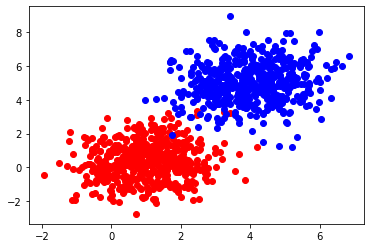

In [3]:
plt.scatter(dist_1[:,0],dist_1[:,1],color='red')
plt.scatter(dist_2[:,0],dist_2[:,1],color='blue')
plt.show()

In [4]:
data=np.zeros((1000,3))

In [5]:
data[:500,:2]=dist_1
data[500:,:2]=dist_2

data[500:,-1]=1.0

In [6]:
print(data)

[[ 0.58954428  1.2814075   0.        ]
 [-0.6657249   1.63849825  0.        ]
 [ 1.52929395  2.84161033  0.        ]
 ...
 [ 4.54752003  5.40637427  1.        ]
 [ 2.4598185   6.2642229   1.        ]
 [ 3.30146992  5.49080804  1.        ]]


In [7]:
np.random.shuffle(data)
print(data[:10])

[[ 3.67239791  3.63975812  1.        ]
 [ 4.02203511  5.66403575  1.        ]
 [ 0.16916664 -0.83634359  0.        ]
 [ 5.77994671  6.91502344  1.        ]
 [ 3.78165345  4.06013219  1.        ]
 [ 4.72301129  7.19604239  1.        ]
 [ 0.95388231 -0.14272434  0.        ]
 [ 1.56791528  1.29493168  0.        ]
 [ 2.09528677  1.04815423  0.        ]
 [ 0.55795562 -0.53842566  0.        ]]


In [8]:
split=int(0.8*data.shape[0])
x_train=data[:split,:-1]
y_train=data[:split,-1]

x_test=data[split:,:-1]
y_test=data[split:,-1]

In [9]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)



(200, 2)
(200,)
(800, 2)
(800,)


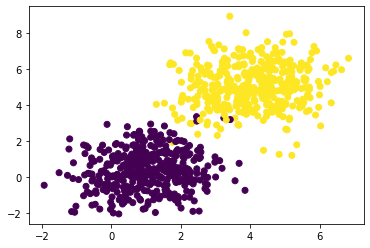

In [10]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show()

In [11]:
#data normalisation

x_mean=x_train.mean(axis=0)
print(x_mean)
x_std=x_train.std(axis=0)

x_train=(x_train-x_mean)/x_std

#apply the same transformation to x_test dont calcuklate mean and std seperalty fro x_test

x_test=(x_test-x_mean)/x_std

[2.54892059 2.75550646]


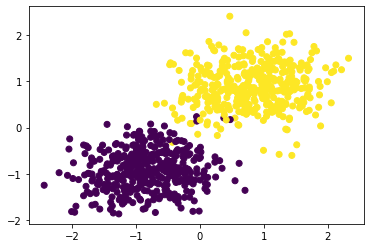

In [12]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show()

### Logistic Regression Implementation

In [13]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))
def hypthesis(X,theta):
    return sigmoid(np.dot(X,theta))

def error(X,y,theta):
    
    hi=hypthesis(X,theta)
    e= -1*np.mean(y*np.log(hi)+(1-y)*(np.log(1-hi))) #Elemnt wise multiplication
     
    return e  
    

In [14]:
def gradient(X,y,theta):
    
    hi=hypthesis(X,theta)
    grad=np.dot(X.T,(y-hi))
    
    return grad/X.shape[0]

def gradient_descent(X,y,lr=0.5,max_steps=500):
    
    n=X.shape[1]
    theta=np.zeros((n,1))
    error_list=[]
    
    for i in range(max_steps):
        e=error(X,y,theta)
        error_list.append(e)
        
        grad=gradient(X,y,theta)
        theta=theta+lr*grad
        
    return theta,error_list

In [15]:
ones=np.ones((x_train.shape[0],1))
x_new_train=np.hstack((ones,x_train))

print(x_new_train)

[[ 1.          0.60989013  0.34292636]
 [ 1.          0.79969394  1.12797229]
 [ 1.         -1.2918716  -1.39297457]
 ...
 [ 1.          0.38663494  1.49418289]
 [ 1.          0.27106542  0.94095636]
 [ 1.         -1.53892358 -0.96923837]]


In [16]:
y_train=y_train.reshape((-1,1))
print(y_train.shape)

(800, 1)


In [17]:
theta,errorlist=gradient_descent(x_new_train,y_train)

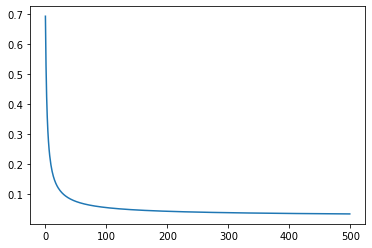

In [18]:
plt.plot(errorlist)
plt.show()

In [19]:
theta

array([[0.34561056],
       [3.04665781],
       [4.53028533]])

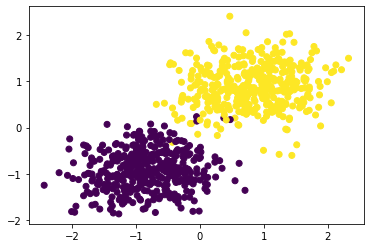

In [20]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show()

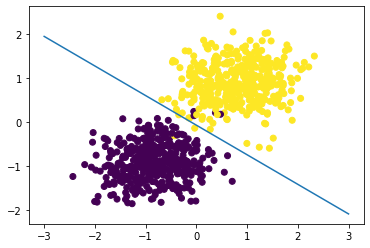

In [21]:
x1=np.arange(-3,4)

x2=-(theta[0]+theta[1]*x1)/theta[2]
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.plot(x1,x2)
plt.show()

In [22]:
x_new_test=np.hstack((np.ones((x_test.shape[0],1)),x_test))
print(x_new_test)
print(x_new_test.shape)


[[ 1.          0.75523552  0.57775173]
 [ 1.         -1.48689706 -0.9444719 ]
 [ 1.          0.40852841  1.06079193]
 [ 1.          0.03288742  0.66224604]
 [ 1.         -1.13112928 -0.76592434]
 [ 1.          0.04876105  0.58759027]
 [ 1.          0.63683099  0.43852363]
 [ 1.          0.41334776  0.58447948]
 [ 1.          1.15526523  1.61715196]
 [ 1.         -1.5948381  -0.85578228]
 [ 1.         -0.02962553  0.70742184]
 [ 1.         -0.48426901 -0.93773389]
 [ 1.         -0.50385954  0.18577067]
 [ 1.         -1.4727696  -1.02981655]
 [ 1.         -1.41643344 -0.68935945]
 [ 1.          0.37944007 -0.5076734 ]
 [ 1.         -0.62081208 -0.63184532]
 [ 1.          0.05902675  0.92291444]
 [ 1.         -1.33548135 -1.00476063]
 [ 1.         -1.52859897 -0.17269533]
 [ 1.          0.82913769  1.761672  ]
 [ 1.         -1.71297771 -0.98726428]
 [ 1.         -0.68278875 -1.89290046]
 [ 1.          0.90125038 -0.60987911]
 [ 1.          0.26416187  0.75156543]
 [ 1.         -1.06153468

In [23]:
def predict(X,theta):
    h=hypthesis(X,theta)
    output=np.zeros(h.shape)
    
    output[h>=0.5]=1
    output=output.astype('int')
   
    return output 


train_preds=predict(x_new_train,theta)
print(train_preds.shape)
test_preds=predict(x_new_test,theta)
print(test_preds.shape)

(800, 1)
(200, 1)


In [24]:
def accuracy(actual,pred):
    actual=actual.astype('int')
    actual=actual.reshape((-1,1))
    acc=np.sum(actual==pred)/actual.shape[0]
    
    return acc*100
    
    

In [25]:
accuracy(y_train,train_preds)

99.25

In [26]:
accuracy(y_test,test_preds)

99.0

In [27]:
print(y_train.shape)

(800, 1)


In [28]:
print(y_test.shape)

(200,)


### Sk-Learn for logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model=LogisticRegression()

In [31]:
model.fit(x_train,y_train)

/Users/parthsharma/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [32]:
theta_0=model.intercept_
theta_s=model.coef_

print(theta_0,theta_s)

[0.34380807] [[2.75784519 4.34754344]]


In [33]:
model.score(x_train,y_train)

0.9925

In [34]:
model.score(x_test,y_test)

0.995

In [35]:
y_pred=model.predict(x_test)

In [37]:
print(y_pred.shape)

(200,)
